In [1]:
%load_ext autoreload
%autoreload 2

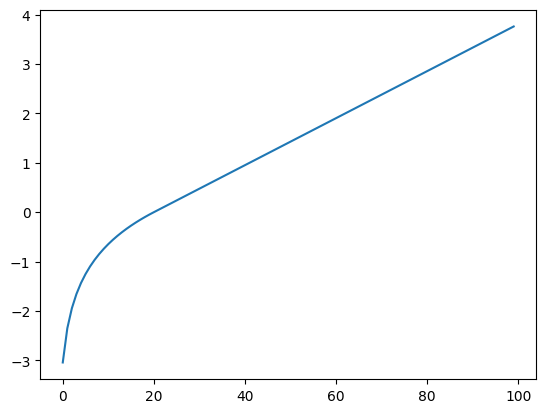

[-3.04452244 -2.35137526 -1.94591015 -1.65822808 -1.43508453 -1.25276297
 -1.09861229 -0.9650809  -0.84729786 -0.74193734 -0.64662716 -0.55961579
 -0.47957308 -0.40546511 -0.33647224 -0.27193372 -0.21130909 -0.15415068
 -0.10008346 -0.04879016  0.          0.04761905  0.0952381   0.14285714
  0.19047619  0.23809524  0.28571429  0.33333333  0.38095238  0.42857143
  0.47619048  0.52380952  0.57142857  0.61904762  0.66666667  0.71428571
  0.76190476  0.80952381  0.85714286  0.9047619   0.95238095  1.
  1.04761905  1.0952381   1.14285714  1.19047619  1.23809524  1.28571429
  1.33333333  1.38095238  1.42857143  1.47619048  1.52380952  1.57142857
  1.61904762  1.66666667  1.71428571  1.76190476  1.80952381  1.85714286
  1.9047619   1.95238095  2.          2.04761905  2.0952381   2.14285714
  2.19047619  2.23809524  2.28571429  2.33333333  2.38095238  2.42857143
  2.47619048  2.52380952  2.57142857  2.61904762  2.66666667  2.71428571
  2.76190476  2.80952381  2.85714286  2.9047619   2.9523809

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def F(age: float, adult_age: float = 20.):
    
    if age <= adult_age:
        y = np.log(age + 1) - np.log(adult_age + 1)
    else:
        y = (age - adult_age) / (adult_age + 1)
    
    return y

age = np.arange(0, 100, 1)
y = np.vectorize(F)(age)

plt.plot(age, y)
plt.show()

print(y)



In [3]:
#import dask as dd



In [4]:
#%%time

#import pandas as pd
#from collections import defaultdict

#dtypes = defaultdict(lambda: 'float32')
#dtypes['ID_REF'] = 'string'

#print('loading...')
#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0, usecols=range(0, 657)).transpose(copy=False)

#print('getting memory...')
#print(feature_df.info(verbose=False, memory_usage='deep'))

#feature_df

In [5]:
%%time

from assignment1 import Assignment1

job = Assignment1(meta_filepath='data/GSE40279_family.soft-MetaData.csv', features_filepath='data/GSE40279_average_beta.txt')

#meta_df = job.load_meta()
#features_df = job.load_features()
X, y = job.load()

processing...
['ID_REF']
CPU times: user 14.5 s, sys: 3.52 s, total: 18 s
Wall time: 15.7 s


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)
print('X', X_train.shape, X_test.shape)
print('Y', y_train.shape, y_test.shape)


model = job.train(X_train=X_train,y_train=y_train, cv_fold=11, n_lambda=7, parallel_jobs=2, std_error_weight_for_lambda_best = 0.5)
#meta_df = job.load_meta()
#meta_df

#features_df
#merged_df = meta_df.join(features_df)

#merged_df

X (524, 473034) (132, 473034)
Y (524,) (132,)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


target_score 0.8729987754404647
mean [4.90883044e-04 7.93881692e-01 8.77460725e-01 8.80259199e-01
 8.79169937e-01]
standard_error [0.00539552 0.0148855  0.01132829 0.01452085 0.01480846]
candidates [-0.00220688  0.78643894  0.87179658  0.87299878  0.87176571]
self.lambda_max_inx_ 3
lambda_best_inx_ [3]


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:   26.9s finished


In [17]:
import numpy as np

print('n_lambda_', model.n_lambda_)
print('lambda_path_', model.lambda_path_, model.lambda_path_.shape)
print('coef_path_', model.coef_path_, model.coef_path_.shape)
print('coef_ for lambda_best', model.coef_, model.coef_.dtype, model.coef_.shape)
print('coef_ nonzero', np.count_nonzero(np.invert(np.isclose(model.coef_, 0, atol=np.finfo(model.coef_.dtype).tiny, rtol=0))))
print('intercept_ for lambda_best', model.intercept_)
print('intercept_path', model.intercept_path_, model.intercept_path_.shape)
print('cv_mean_score_', model.cv_mean_score_, model.cv_mean_score_.shape)
print('cv_standard_error_', model.cv_standard_error_)
print('lambda_max_', model.lambda_max_)
print('lambda_best_', model.lambda_best_)

n_lambda_ 5
lambda_path_ [12.44071124  2.68026999  0.57744666  0.12440711  0.0268027 ] (5,)
coef_path_ [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] (473034, 5)
coef_ for lambda_best [0. 0. 0. ... 0. 0. 0.] float64 (473034,)
coef_ nonzero 447
intercept_ for lambda_best 10.94254575601888
intercept_path [63.88740458  9.26593329 -3.032176   10.94254576  2.82790727] (5,)
cv_mean_score_ [4.90883044e-04 7.93881692e-01 8.77460725e-01 8.80259199e-01
 8.79169937e-01] (5,)
cv_standard_error_ [0.00539552 0.0148855  0.01132829 0.01452085 0.01480846]
lambda_max_ 0.12440711242123012
lambda_best_ [0.12440711]


mean -0.12332336188003584
standard deviation 1.0402057469412038


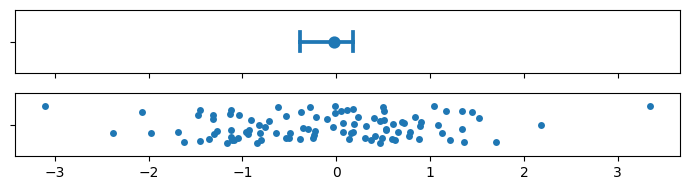

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    
    f, axs = plt.subplots(2, figsize=(7,2), sharex=True, layout='tight')
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])
    
    print('mean', np.mean(x))
    print('standard deviation', np.std(x))
    
plot_errorbars('ci', estimator='median', n_boot=5000, seed=10)
    

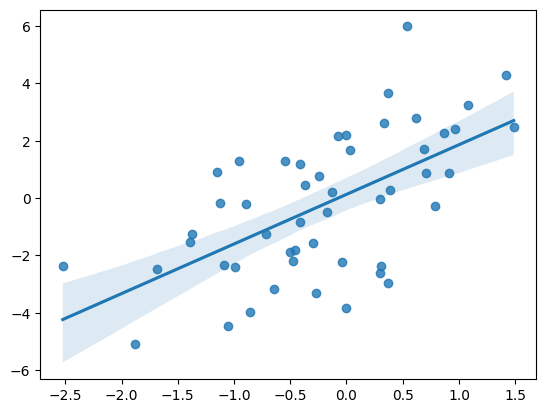

<Axes: >

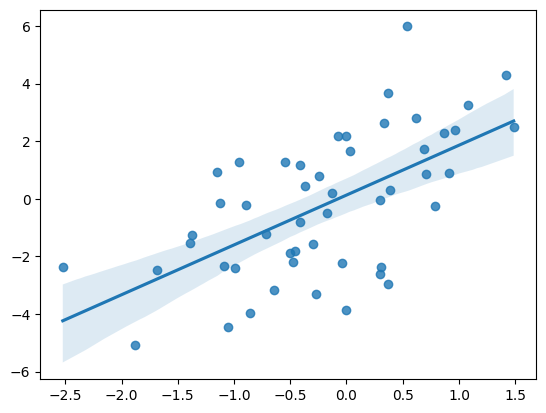

In [9]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)

sns.regplot(x=x, y=y, ci=95)
plt.show()
sns.regplot(x=x, y=y)

In [10]:
# one sample t test https://medium.com/@TheDataScience-ProF/one-sample-t-test-in-python-f73eea1a87bf
import scipy.stats as stats

sample = [2, 3, 4, 5, 6, 7, 8, 9, 10]
population_mean = 5

t_statistic, p_value = stats.ttest_1samp(sample, population_mean)

print('t_statistic', t_statistic)
print('p_value', p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Significant differences exist between the sample mean and the population mean.")
else:
    print("Fail to reject the null hypothesis. No significant differences exist between the sample mean and the population mean.")
    
# https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

t_statistic 1.0954451150103321
p_value 0.3052013652062302
Fail to reject the null hypothesis. No significant differences exist between the sample mean and the population mean.


In [11]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


lambda max
lambda:  0.12440711242123012
median_absolute_error 3.1151834393316875
explained_variance_score 0.89389832619128
root_mean_squared_error 5.224344901480052
r2 0.893895671235914
t-test Ttest_indResult(statistic=0.013981762954870946, pvalue=0.9888551714848279)
smstats r2 0.8981257435070208
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.46e-66
Time:                        11:22:25   Log-Likelihood:                -386.38
No. Observations:                 132   AIC:                             776.8
Df Residuals:                     130   BIC:                             782.5
Df Model:                           1                                 

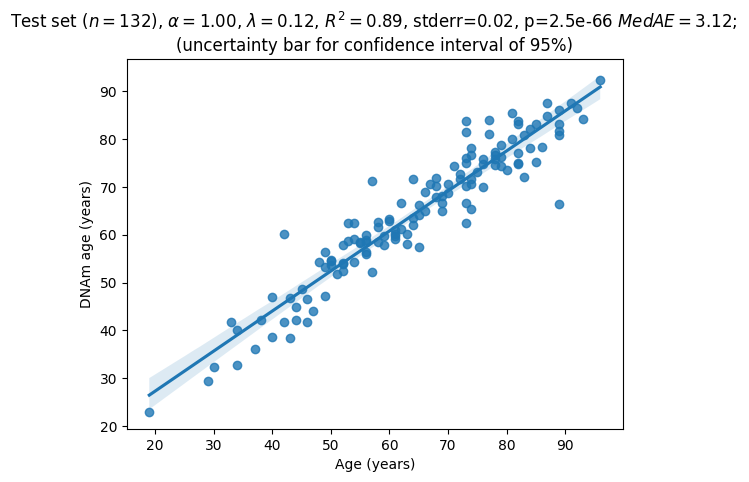

lambda best
lambda:  0.12440711242123012
median_absolute_error 3.1151834393316875
explained_variance_score 0.89389832619128
root_mean_squared_error 5.224344901480052
r2 0.893895671235914
t-test Ttest_indResult(statistic=0.013981762954870946, pvalue=0.9888551714848279)
smstats r2 0.8981257435070208
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.46e-66
Time:                        11:22:28   Log-Likelihood:                -386.38
No. Observations:                 132   AIC:                             776.8
Df Residuals:                     130   BIC:                             782.5
Df Model:                           1                                

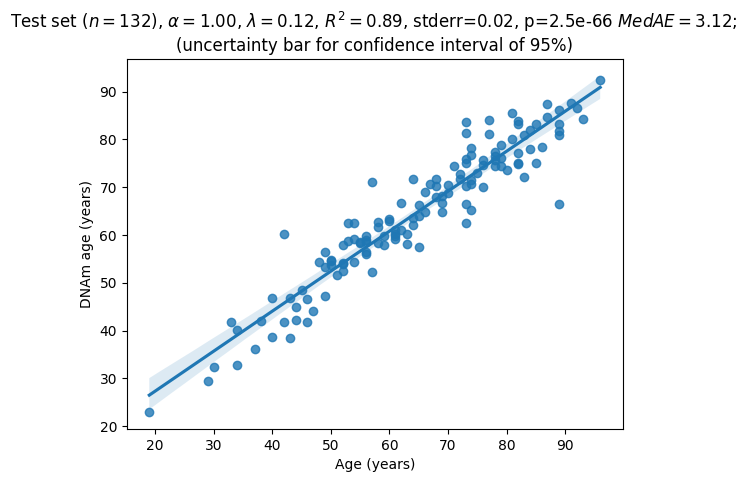

In [12]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, median_absolute_error
import numpy as np
import sigfig
import glmnet
import statsmodels.api as sm
from sklearn.feature_selection import chi2 

def calculate_stats(X_test, y_test, lamb: float, model: glmnet.ElasticNet):
    y_pred = job.predict(X=X_test, lamb=lamb)
    
    print('lambda: ', lamb)
    
    medae = median_absolute_error(y_true=y_test, y_pred=y_pred)
    
    print('median_absolute_error', medae)
    print('explained_variance_score', explained_variance_score(y_test, y_pred))
    print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))
    
    r2 = r2_score(y_test, y_pred)
    print('r2', r2)
    
    independent_samples_t_test = stats.ttest_ind(y_pred, y_test, equal_var=True)
    print('t-test', independent_samples_t_test)
    
    sm_y_test = sm.add_constant(y_test) # column of 1s
    sm_model = sm.OLS(y_pred, sm_y_test).fit()
    print("smstats r2", sm_model.rsquared)
    print(sm_model.summary())
    print('pvalues', sm_model.pvalues)
    
    #chi2_scores, chi2_pvalues = chi2(y_pred, y_test)
    #print('chi2_scores, chi2_pvalues', chi2_scores, chi2_pvalues)
    
    print('glmnet r2', model.score(X=X_test, y=y_test, lamb=lamb))
    
    linregress_result = stats.linregress(y_test, y_pred)
    p_value = sigfig.round(linregress_result.pvalue, sigfigs=2)
    standard_error = linregress_result.stderr
    
    print('stats linregress', linregress_result)
    
    
    # https://seaborn.pydata.org/tutorial/error_bars.html
    sns.regplot(x = y_test, y = y_pred, ci=99, label='alma', n_boot=5000).set(title=f'Test set ($n={np.shape(X_test)[0]}$), $\\alpha={model.alpha:.2f}$, $\lambda={lamb:.2f}$, $R^2={r2:.2f}$, stderr={standard_error:.2f}, p={p_value} $MedAE={medae:.2f}$; \n(uncertainty bar for confidence interval of 95%)', xlabel='Age (years)', ylabel='DNAm age (years)')
    plt.show()

print('lambda max')
calculate_stats(X_test=X_test, y_test=y_test,  lamb=model.lambda_max_, model=model)
print('lambda best')
calculate_stats(X_test=X_test, y_test=y_test,  lamb=model.lambda_best_[0], model=model)

#y_pred = model.predict(X_test)
#print(y_pred)

# compare with the y_test


In [13]:
#import pandas as pd

#meta_df = pd.read_csv('data/GSE40279_family.soft-MetaData.csv', delimiter='|')

# split sample title to get the id
#meta_df.str.split(' ', )

#display(meta_df.head())
#print('size: ', meta_df.shape)

#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0).T

#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0)

#display(feature_df.head())
#print('size: ',feature_df.shape)



In [14]:
#from sklearn.model_selection import train_test_split

#y = meta_df['age (y)'].astype(float)
#print(y, type(y))

#X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size=0.2, random_state=42)

#print('X', X_train.shape, X_test.shape)
#print('Y', y_train.shape, y_test.shape)

In [15]:
#from glmnet import ElasticNet

#model = ElasticNet()
#model = model.fit(X_train, y_train)

#print(model)

In [16]:
#import sklearn
#print(sklearn.__version__)